In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def load_mnist():
	(X_train, y_train), (X_test, y_test) = mnist.load_data()
	return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_mnist()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
img = X_train[0]

In [ ]:
img.shape

(28, 28)

In [ ]:
np.min(img)

np.uint8(0)

In [ ]:
def visualize_image(img_array):
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

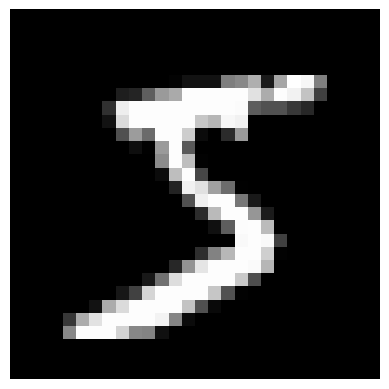

In [ ]:
visualize_image(img)

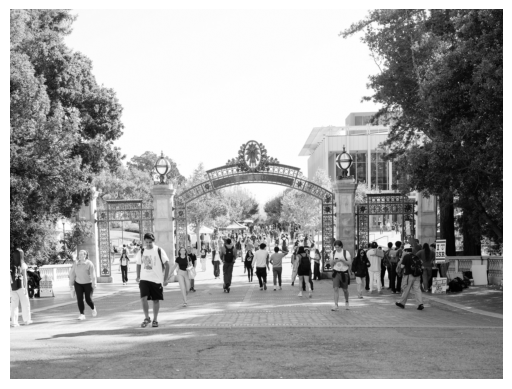

In [ ]:
import requests
from io import BytesIO

img_url = "https://www.berkeley.edu/wp-content/uploads/2025/06/231011UCB2153-scaled-1.jpg"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

img.thumbnail((1000, 1000))
img_gray = img.convert('L')

img_array = np.array(img_gray)

visualize_image(img_array)

In [ ]:
np.min(img_array)

np.uint8(0)

In [ ]:
np.max(img_array)

np.uint8(255)

In [ ]:
img_array.shape

(750, 1000)

# SVD from Scratch

now want to break up this matrix into the 3 parts

A = U * sigma * V^T

In [ ]:
""" normalize bc without it for some reason the eigenvalues are negative (for a positive semi-definite matrix which makes no sense) """
A = img_array / 255

In [ ]:
A.shape

(750, 1000)

In [ ]:
S_l = A @ A.T         # A * A^T
S_r = A.T @ A         # A^T * A

In [ ]:
print(np.array_equal(S_l, S_l.T))
print(np.array_equal(S_r, S_r.T))

True
True


In [ ]:
U_eig_val, U_eig_vec = np.linalg.eigh(S_l)
V_eig_val, V_eig_vec = np.linalg.eigh(S_r)

idx_u = np.argsort(U_eig_val)[::-1]
U_eig_val_sorted = U_eig_val[idx_u]
U_eig_vec_sorted = U_eig_vec[:, idx_u]

idx_v = np.argsort(V_eig_val)[::-1]
V_eig_val_sorted = V_eig_val[idx_v]
V_eig_vec_sorted = V_eig_vec[:, idx_v]

In [ ]:
# print(f"OLD: {U_eig_val}")
# print(f"NEW: {U_eig_val_sorted}")

In [ ]:
# print(f"OLD: {U_eig_vec[7]}")
# print(f"NEW: {U_eig_vec_sorted[-8]}")

In [ ]:
V_eig_val_sorted[V_eig_val_sorted < 0] = 0
U_eig_val_sorted[U_eig_val_sorted < 0] = 0

In [ ]:
singular_vals = np.sqrt(V_eig_val_sorted)

In [ ]:
m, n = A.shape
singular_vals = np.sqrt(V_eig_val_sorted)

# Create a diagonal matrix with singular values
Sigma = np.zeros((m, n))
min_dim = min(m, n)
Sigma[:min_dim, :min_dim] = np.diag(singular_vals[:min_dim])

U = U_eig_vec_sorted
V = V_eig_vec_sorted

In [ ]:
"""

basically the issue is that np.linalg.eigh can sometime make an eigenvector negative (bc techincally this is still valid)

valid bc its norm is still 1

not sure how it decides to use positive or negative

"""

# Iterate only up to the minimum dimension (number of singular values)
for i in range(min(A.shape)):
    Av = A @ V[:, i]
    expected = singular_vals[i] * U[:, i]

    # If dot product is negative, they point opposite directions
    if np.dot(Av, expected) < 0:
        # print(np.dot(Av, expected))
        # print(V[:, i])
        V[:, i] = -V[:, i]  # flip the sign
        # print(V[:, i])
        # Av = A @ V[:, i]
        # expected = singular_vals[i] * U[:, i]
        # print(np.dot(Av, expected))
        # print('-----')

In [ ]:
print(f"U shape:     {U.shape}")
print(f"Sigma shape: {Sigma.shape}")
print(f"V shape:     {V.shape}")

U shape:     (750, 750)
Sigma shape: (750, 1000)
V shape:     (1000, 1000)


In [ ]:
A_reconstructed = U @ Sigma @ V.T

In [ ]:
A_reconstructed.shape

(750, 1000)

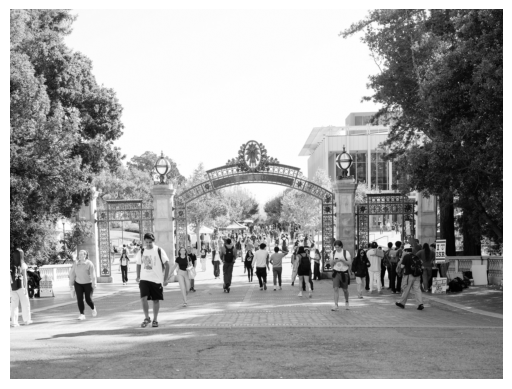

In [ ]:
visualize_image(A)

In [ ]:
A_reconstructed = (A_reconstructed * 255).astype(np.uint8)

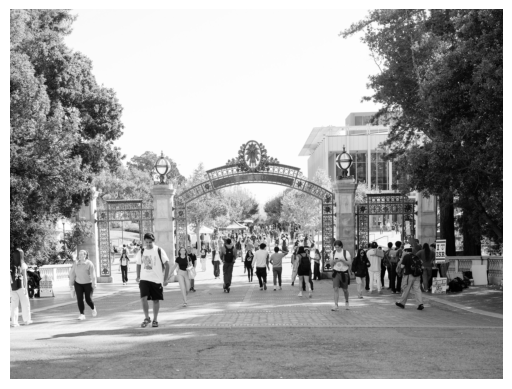

In [ ]:
visualize_image(A_reconstructed)

In [ ]:
ks = [1, 5, 10, 15, 25, 50, 100, min(A.shape)]

A_ks = []
A_ks_reconstructed = []

for k in ks:
    # Ensure k does not exceed the minimum dimension
    k = min(k, min(A.shape))
    A_k = U[:, :k] @ Sigma[:k, :k] @ V[:, :k].T
    A_ks.append(A_k)
    A_k_reconstructed = (A_k * 255).astype(np.uint8)
    A_ks_reconstructed.append(A_k_reconstructed)

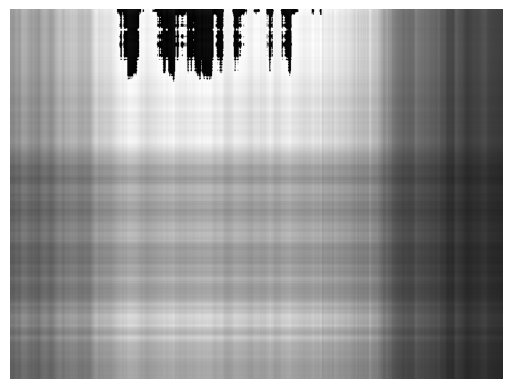

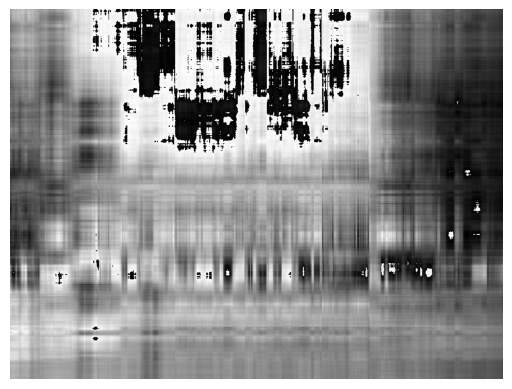

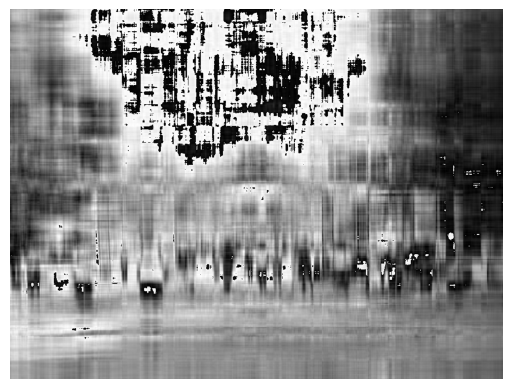

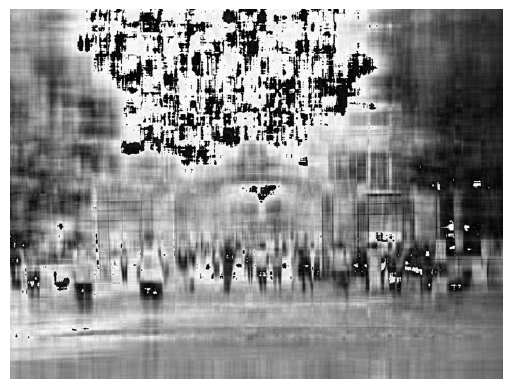

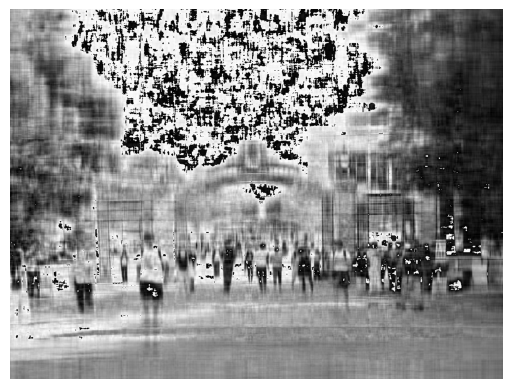

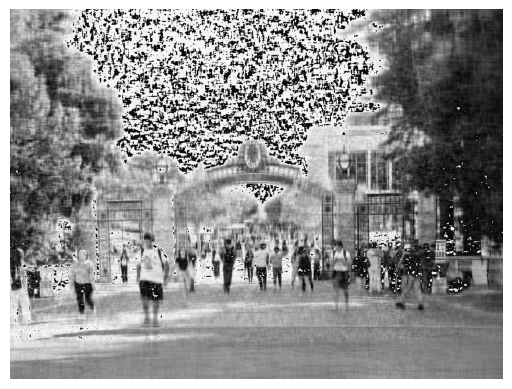

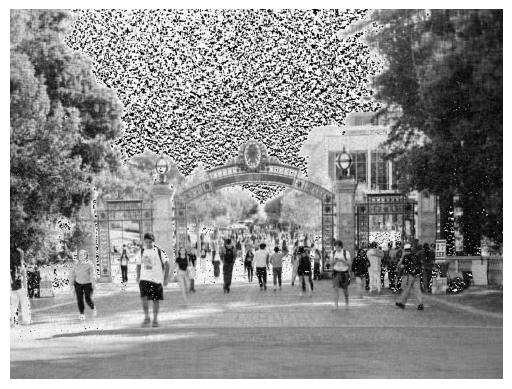

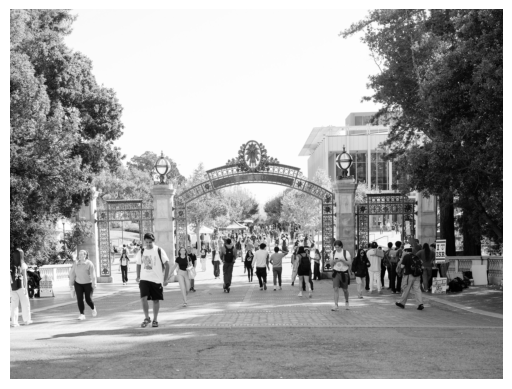

In [ ]:
for k in range(len(ks)):
    visualize_image(A_ks_reconstructed[k])